In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Load

In [2]:
df_train = pd.read_csv('data/application_train.csv')
df_test = pd.read_csv('data/application_test.csv')

df_train.columns = [col.lower() for col in df_train.columns]
df_test.columns = [col.lower() for col in df_test.columns]

df_train.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# EDA Workspace

In [3]:
pd.DataFrame(data={
    'train_percent': df_train.isnull().mean(),
    'test_percent': df_test.isnull().mean(),
    'train_total': df_train.isnull().sum(),
    'test_total': df_test.isnull().sum(),
})

,train_percent,test_percent,train_total,test_total
amt_annuity,0.000039,0.000492,12,24.0
amt_credit,0.000000,0.000000,0,0.0
amt_goods_price,0.000904,0.000000,278,0.0
amt_income_total,0.000000,0.000000,0,0.0
amt_req_credit_bureau_day,0.135016,0.124097,41519,6049.0
amt_req_credit_bureau_hour,0.135016,0.124097,41519,6049.0
amt_req_credit_bureau_mon,0.135016,0.124097,41519,6049.0
amt_req_credit_bureau_qrt,0.135016,0.124097,41519,6049.0
amt_req_credit_bureau_week,0.135016,0.124097,41519,6049.0
amt_req_credit_bureau_year,0.135016,0.124097,41519,6049.0


Percent of defaults in training df

In [4]:
len(df_train[df_train['target'] == 1])/len(df_train)

0.08072881945686496

In [5]:
df_train.corr()[df_train.corr() > 0.80]

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,totalarea_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
sk_id_curr,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cnt_children,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.879161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt_income_total,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt_credit,NaN,NaN,NaN,NaN,1.000000,NaN,0.986968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
df_test.corr()[df_train.corr() > 0.80]

,sk_id_curr,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,totalarea_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
sk_id_curr,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cnt_children,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt_income_total,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt_credit,NaN,NaN,NaN,1.000000,NaN,0.988056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt_annuity,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Drop Columns

Dropping various columns for various reasons.

---

These columns contain normalized information about where the client lives. Each column is missing about 45-70% of the data. Could be used in the future but not low hanging fruit.

note*, using different indices for df_test because there is no 'target' column

In [7]:
df_train.drop(df_train.columns[range(44, 91)], inplace=True, axis=1)
df_test.drop(df_test.columns[range(43, 90)], inplace=True, axis=1)

These columns were either viewed as not important or highly correlated with another feature during EDA

In [8]:
drop_cols = [
    'weekday_appr_process_start',
    'region_rating_client_w_city',
    'obs_60_cnt_social_circle',
    'def_60_cnt_social_circle',
    'amt_req_credit_bureau_hour',
    'amt_req_credit_bureau_week',
    'amt_req_credit_bureau_mon',
    'amt_req_credit_bureau_year'
]

for col in drop_cols:
    df_train.drop(col, inplace=True, axis=1)
    df_test.drop(col, inplace=True, axis=1)

These columns could be worth some imputing in the future if there's time

In [9]:
imputable_cols = [
    'own_car_age',
    'occupation_type',
    'ext_source_1',
    'ext_source_3',
    'amt_req_credit_bureau_day',
    'amt_req_credit_bureau_qrt'
]

for col in imputable_cols:
    df_train.drop(col, inplace=True, axis=1)
    df_test.drop(col, inplace=True, axis=1)

There should only be 61 columns now in the train and 60 in the test, down from 122/121

In [10]:
print(df_train.shape)
print(df_test.shape)

(307511, 61)
(48744, 60)


# Clean and Bin

Impute a few values and turn strings into 1 and 0's. Just this simple stuff here.

## Gender

Change 'M' and 'F' to 1 and 0 respectively. 'XAN' is assumed to be female.

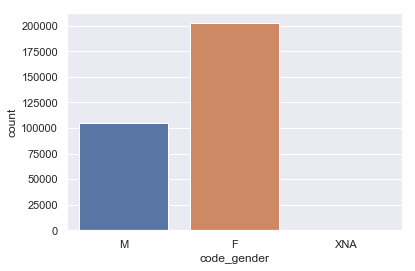

In [11]:
np.unique(df_train['code_gender'])
sns.countplot(df_train['code_gender'])

In [12]:
idxs = df_train[df_train['code_gender'] == 'XNA'].index

for idx in idxs:
    df_train.at[idx, 'code_gender'] = 'F'
np.unique(df_train['code_gender'])

array(['F', 'M'], dtype=object)

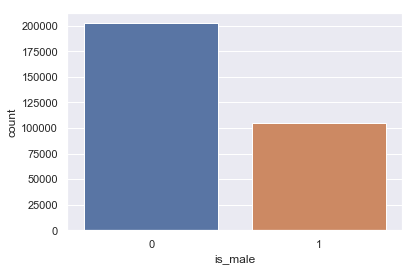

In [13]:
foo = lambda x: 1 if x == 'M' else 0
df_train['code_gender'] = df_train['code_gender'].apply(foo)
df_test['code_gender'] = df_test['code_gender'].apply(foo)
df_train.rename(columns={'code_gender': 'is_male'}, inplace=True)
df_test.rename(columns={'code_gender': 'is_male'}, inplace=True)
sns.countplot(df_train['is_male'])

## Car

Change 'Y' and 'N' to 1 and 0 respectively.

['N' 'Y']


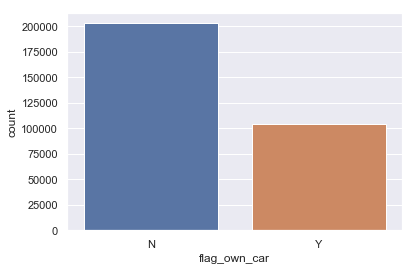

In [14]:
print(np.unique(df_train['flag_own_car']))
sns.countplot(df_train['flag_own_car'])

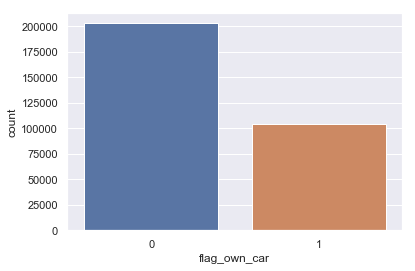

In [15]:
foo = lambda x: 1 if x == 'Y' else 0
df_train['flag_own_car'] = df_train['flag_own_car'].apply(foo)
sns.countplot(df_train['flag_own_car'])

## Realty

Change 'Y' and 'N' to 1 and 0 respectively.

['N' 'Y']


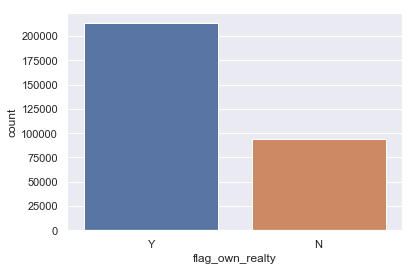

In [16]:
print(np.unique(df_train['flag_own_realty']))
sns.countplot(df_train['flag_own_realty'])

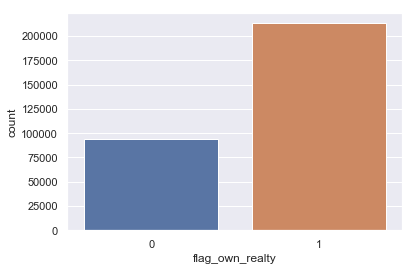

In [17]:
foo = lambda x: 1 if x == 'Y' else 0
df_train['flag_own_realty'] = df_train['flag_own_realty'].apply(foo)
sns.countplot(df_train['flag_own_realty'])

## Amount of Annuity

Imputing the median

/Users/blairthurman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


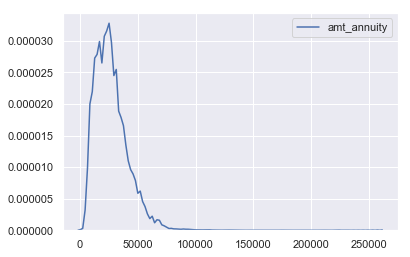

In [18]:
x = df_train[~df_train['amt_annuity'].isnull()]['amt_annuity']
sns.kdeplot(x)

In [19]:
median = df_train['amt_annuity'].median()
print(median)

24903.0


In [20]:
idxs = df_train[df_train['amt_annuity'].isnull()]['amt_annuity'].index

for idx in idxs:
    df_train.at[idx, 'amt_annuity'] = median

idxs = df_test[df_test['amt_annuity'].isnull()]['amt_annuity'].index

for idx in idxs:
    df_test.at[idx, 'amt_annuity'] = median

## Amount of Good Price

Imputing the median

/Users/blairthurman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


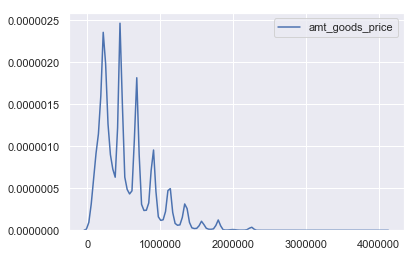

In [21]:
x = df_train[~df_train['amt_goods_price'].isnull()]['amt_goods_price']
sns.kdeplot(x)

In [22]:
median = df_train['amt_goods_price'].median()
print(median)

450000.0


In [23]:
idxs = df_train[df_train['amt_goods_price'].isnull()]['amt_goods_price'].index

for idx in idxs:
    df_train.at[idx, 'amt_goods_price'] = median

idxs = df_test[df_test['amt_goods_price'].isnull()]['amt_goods_price'].index

for idx in idxs:
    df_test.at[idx, 'amt_goods_price'] = median

## Name Contract Type

Turn into binary of is a revolving loan or not. (Otherwise it's a cash loan)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

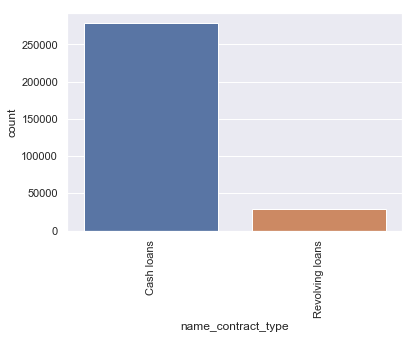

In [24]:
sns.countplot(df_train['name_contract_type'])
plt.xticks(rotation='vertical')

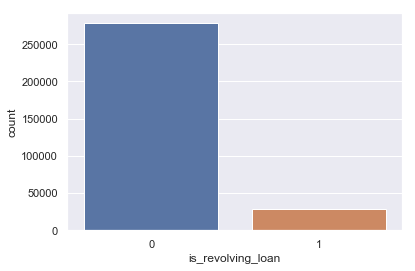

In [25]:
foo = lambda x: 1 if x == 'Revolving loans' else 0
df_train['name_contract_type'] = df_train['name_contract_type'].apply(foo)
df_test['name_contract_type'] = df_test['name_contract_type'].apply(foo)
df_train.rename(columns={'name_contract_type': 'is_revolving_loan'}, inplace=True)
df_test.rename(columns={'name_contract_type': 'is_revolving_loan'}, inplace=True)
sns.countplot(df_train['is_revolving_loan'])

## Name Education Type

Turn into binary of have at least attended college or no college at all. 

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: name_education_type, dtype: int64


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

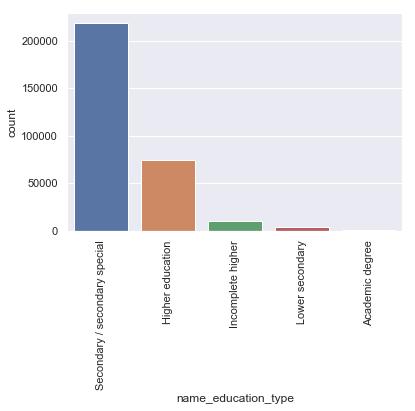

In [26]:
print(df_train['name_education_type'].value_counts())
sns.countplot(df_train['name_education_type'])
plt.xticks(rotation='vertical')

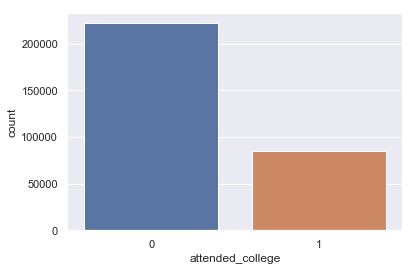

In [27]:
college = ['Higher education', 'Incomplete higher', 'Academic degree']
secondary = ['Secondary / secondary special', 'Lower secondary']

foo = lambda x: 1 if x in college else 0
df_train['name_education_type'] = df_train['name_education_type'].apply(foo)
df_test['name_education_type'] = df_test['name_education_type'].apply(foo)
df_train.rename(columns={'name_education_type': 'attended_college'}, inplace=True)
df_test.rename(columns={'name_education_type': 'attended_college'}, inplace=True)
sns.countplot(df_train['attended_college'])

## Name Family Status

Turn into binary of is married or not.

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: name_family_status, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

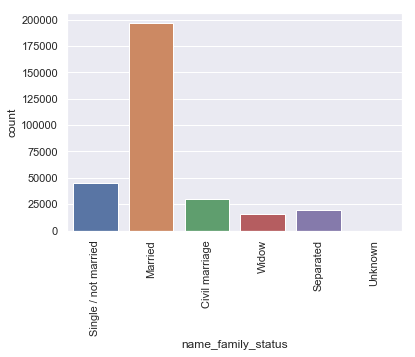

In [28]:
print(df_train['name_family_status'].value_counts())
sns.countplot(df_train['name_family_status'])
plt.xticks(rotation='vertical')

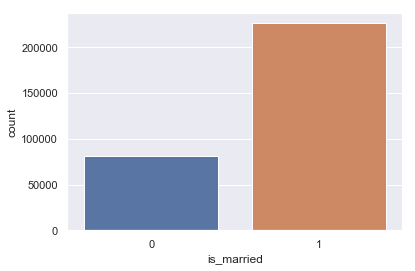

In [29]:
married = ['Married', 'Civil marriage']
single = ['Single / not married', 'Separated', 'Widow', 'Unknown']

foo = lambda x: 1 if x in married else 0
df_train['name_family_status'] = df_train['name_family_status'].apply(foo)
df_test['name_family_status'] = df_test['name_family_status'].apply(foo)
df_train.rename(columns={'name_family_status': 'is_married'}, inplace=True)
df_test.rename(columns={'name_family_status': 'is_married'}, inplace=True)
sns.countplot(df_train['is_married'])

## Name Housing Type

Turn into binary of if they live with their parents or not.

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: name_housing_type, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

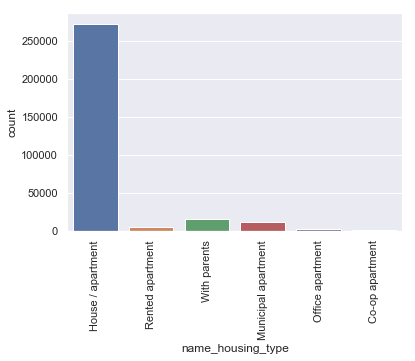

In [30]:
print(df_train['name_housing_type'].value_counts())
sns.countplot(df_train['name_housing_type'])
plt.xticks(rotation='vertical')

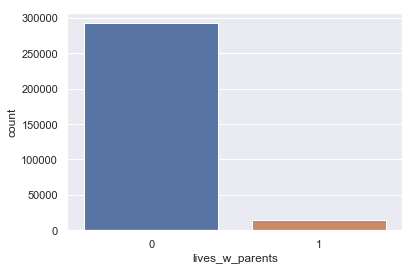

In [31]:
foo = lambda x: 1 if x == 'With parents' else 0
df_train['name_housing_type'] = df_train['name_housing_type'].apply(foo)
df_test['name_housing_type'] = df_test['name_housing_type'].apply(foo)
df_train.rename(columns={'name_housing_type': 'lives_w_parents'}, inplace=True)
df_test.rename(columns={'name_housing_type': 'lives_w_parents'}, inplace=True)
sns.countplot(df_train['lives_w_parents'])

## Name Income Type

Turn into binary of if they are retired or not.

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: name_income_type, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

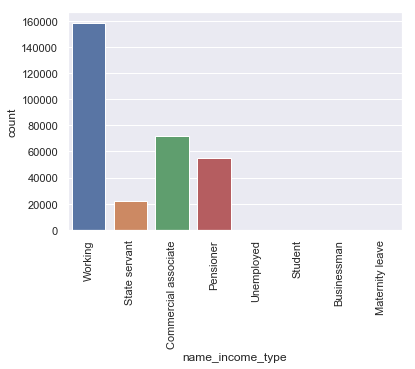

In [32]:
print(df_train['name_income_type'].value_counts())
sns.countplot(df_train['name_income_type'])
plt.xticks(rotation='vertical')

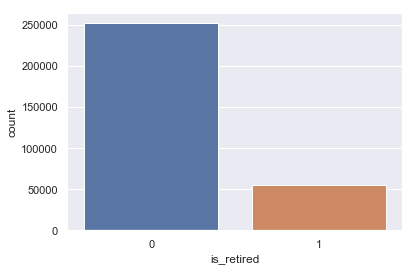

In [33]:
foo = lambda x: 1 if x == 'Pensioner' else 0
df_train['name_income_type'] = df_train['name_income_type'].apply(foo)
df_test['name_income_type'] = df_test['name_income_type'].apply(foo)
df_train.rename(columns={'name_income_type': 'is_retired'}, inplace=True)
df_test.rename(columns={'name_income_type': 'is_retired'}, inplace=True)
sns.countplot(df_train['is_retired'])

## Name Type Suite

Turn into binary of alone vs accompanied. Also imputes ~1200 NaN's as alone.

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: name_type_suite, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

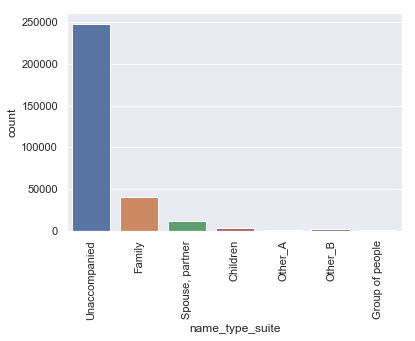

In [34]:
print(df_train['name_type_suite'].value_counts())
sns.countplot(df_train['name_type_suite'])
plt.xticks(rotation='vertical')

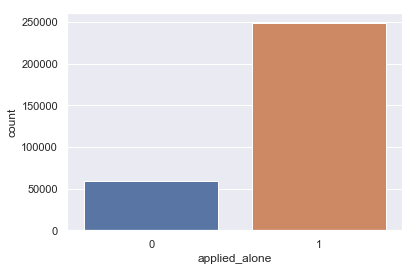

In [35]:
foo = lambda x: 1 if x == 'Unaccompanied' else 0
df_train['name_type_suite'] = df_train['name_type_suite'].apply(foo)
df_test['name_type_suite'] = df_test['name_type_suite'].apply(foo)
df_train.rename(columns={'name_type_suite': 'applied_alone'}, inplace=True)
df_test.rename(columns={'name_type_suite': 'applied_alone'}, inplace=True)
sns.countplot(df_train['applied_alone'])

## Count of Family Members

Imputing the mode

/Users/blairthurman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


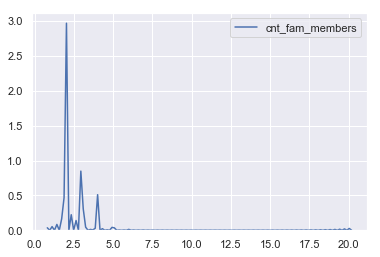

In [36]:
x = df_train[~df_train['cnt_fam_members'].isnull()]['cnt_fam_members']
sns.kdeplot(x)

In [37]:
mode = stats.mode(df_train['cnt_fam_members'])[0][0]
mode

2.0

In [38]:
idxs = df_train[df_train['cnt_fam_members'].isnull()]['cnt_fam_members'].index

for idx in idxs:
    df_train.at[idx, 'cnt_fam_members'] = mode

idxs = df_test[df_test['cnt_fam_members'].isnull()]['cnt_fam_members'].index

for idx in idxs:
    df_test.at[idx, 'cnt_fam_members'] = mode

## Region Rating Client

Turn this into (1 & 3) vs. 2

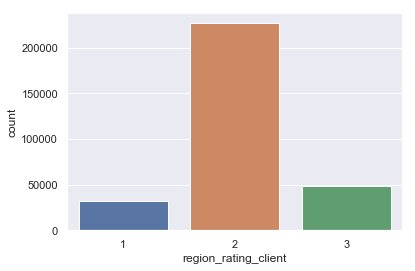

In [39]:
sns.countplot(df_train['region_rating_client'])

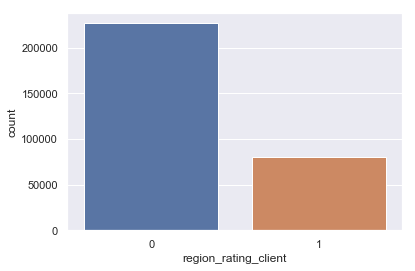

In [40]:
foo = lambda x: 1 if x != 2 else 0
df_train['region_rating_client'] = df_train['region_rating_client'].apply(foo)
df_test['region_rating_client'] = df_test['region_rating_client'].apply(foo)
sns.countplot(df_train['region_rating_client'])

## Hour Appr Process Start

Turn this into binary value of completed during business hours (9am-5pm) or not

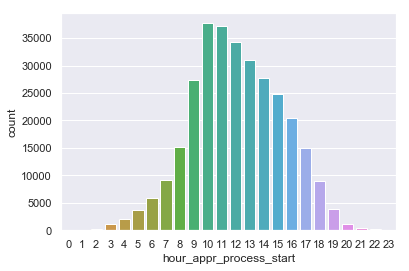

In [41]:
sns.countplot(df_train['hour_appr_process_start'])

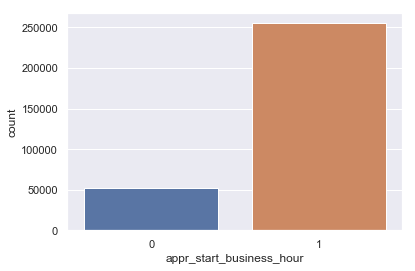

In [42]:
foo = lambda x: 1 if x in range(9,18) else 0
df_train['hour_appr_process_start'] = df_train['hour_appr_process_start'].apply(foo)
df_test['hour_appr_process_start'] = df_test['hour_appr_process_start'].apply(foo)
df_train.rename(columns={'hour_appr_process_start': 'appr_start_business_hour'}, inplace=True)
df_test.rename(columns={'hour_appr_process_start': 'appr_start_business_hour'}, inplace=True)
sns.countplot(df_train['appr_start_business_hour'])

## EXT Source 2

Imputing median

/Users/blairthurman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/blairthurman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/blairthurman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


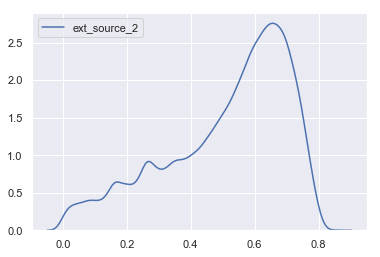

In [43]:
sns.kdeplot(df_train['ext_source_2'])

In [44]:
median = df_train['ext_source_2'].median()
median

0.5659614260608526

In [45]:
idxs = df_train[df_train['ext_source_2'].isnull()]['ext_source_2'].index
for idx in idxs:
    df_train.at[idx, 'ext_source_2'] = mode

idxs = df_test[df_test['ext_source_2'].isnull()]['ext_source_2'].index
for idx in idxs:
    df_test.at[idx, 'ext_source_2'] = mode

## OBS 30 CNT Social Circle

Imputing median

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

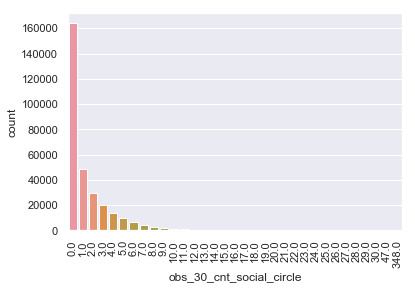

In [46]:
sns.countplot(df_train['obs_30_cnt_social_circle'])
plt.xticks(rotation='vertical')

In [47]:
mode = stats.mode(df_train['obs_30_cnt_social_circle'])[0][0]

idxs = df_train[df_train['obs_30_cnt_social_circle'].isnull()]['obs_30_cnt_social_circle'].index
for idx in idxs:
    df_train.at[idx, 'obs_30_cnt_social_circle'] = mode

idxs = df_test[df_test['obs_30_cnt_social_circle'].isnull()]['obs_30_cnt_social_circle'].index
for idx in idxs:
    df_test.at[idx, 'obs_30_cnt_social_circle'] = mode

## DEF 30 CNT Social Circle

Imputing median

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

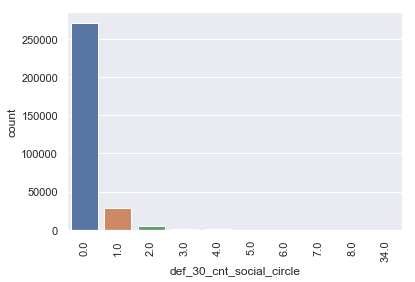

In [48]:
sns.countplot(df_train['def_30_cnt_social_circle'])
plt.xticks(rotation='vertical')

In [49]:
mode = stats.mode(df_train['def_30_cnt_social_circle'])[0][0]

idxs = df_train[df_train['def_30_cnt_social_circle'].isnull()]['def_30_cnt_social_circle'].index
for idx in idxs:
    df_train.at[idx, 'def_30_cnt_social_circle'] = mode

idxs = df_test[df_test['def_30_cnt_social_circle'].isnull()]['def_30_cnt_social_circle'].index
for idx in idxs:
    df_test.at[idx, 'def_30_cnt_social_circle'] = mode

## Days Last Phone Change

Just one missing value

/Users/blairthurman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/blairthurman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/blairthurman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


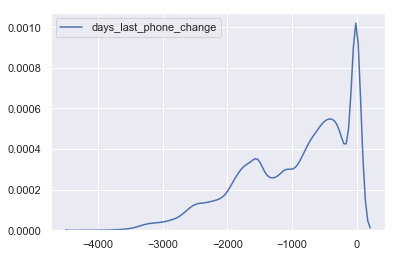

In [50]:
sns.kdeplot(df_train['days_last_phone_change'])

In [51]:
idx = df_train[df_train['days_last_phone_change'].isnull()]['days_last_phone_change'].index[0]
df_train.at[idx, 'days_last_phone_change'] = 0

In [52]:
df_train.head()

,sk_id_curr,target,is_revolving_loan,is_male,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,applied_alone,is_retired,attended_college,is_married,lives_w_parents,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,appr_start_business_hour,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,obs_30_cnt_social_circle,def_30_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,1,0,0,0,0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,0,1,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0,0,1,1,0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0,0,0,0,0,0,School,0.622246,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,1,0,0,0,0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,0,1,0,0,0,0,0,0,Government,0.555912,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,1,0,0,1,0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,0,1,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,1,0,0,0,0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,0,1,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


EDA using Pearson's r showed that def and obs were not too correlated; but, the sets of 30 and 60 were correlated (Obs r: 0.998, Def r: 0.861). So I opted for only one set, and picked the 30.

# Validation

In [53]:
pd.DataFrame(data={
    'train_percent': df_train.isnull().mean(),
    'test_percent': df_test.isnull().mean(),
    'train_total': df_train.isnull().sum(),
    'test_total': df_test.isnull().sum(),
})

,train_percent,test_percent,train_total,test_total
amt_annuity,0.0,0.0,0,0.0
amt_credit,0.0,0.0,0,0.0
amt_goods_price,0.0,0.0,0,0.0
amt_income_total,0.0,0.0,0,0.0
applied_alone,0.0,0.0,0,0.0
appr_start_business_hour,0.0,0.0,0,0.0
attended_college,0.0,0.0,0,0.0
cnt_children,0.0,0.0,0,0.0
cnt_fam_members,0.0,0.0,0,0.0
days_birth,0.0,0.0,0,0.0


In [54]:
df_train.corr()[df_train.corr() > 0.80]

,sk_id_curr,target,is_revolving_loan,is_male,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,applied_alone,is_retired,attended_college,is_married,lives_w_parents,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,appr_start_business_hour,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_2,obs_30_cnt_social_circle,def_30_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21
sk_id_curr,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_revolving_loan,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_male,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flag_own_car,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flag_own_realty,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cnt_children,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.87916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt_income_total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt_credit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.986734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt_annuity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_test.corr()[df_train.corr() > 0.80]

,sk_id_curr,is_revolving_loan,is_male,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,applied_alone,is_retired,attended_college,is_married,lives_w_parents,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,appr_start_business_hour,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_2,obs_30_cnt_social_circle,def_30_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21
sk_id_curr,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_revolving_loan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_male,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cnt_children,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt_income_total,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt_credit,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.988056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt_annuity,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt_goods_price,NaN,NaN,NaN,NaN,NaN,0.988056,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
applied_alone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,0.99983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Save

In [56]:
df_train.to_csv('data/application_train_clean.csv', index=False)
df_test.to_csv('data/application_test_clean.csv', index=False)